## Import Dependencies

In [16]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data into DataFrame

In [3]:
data = pd.read_csv("listings.csv")

### Basic EDA and Profiling

In [ ]:
profiling_report = sv.analyze(data)
profiling_report.show_html()

### Data Cleanup

In [ ]:
columns_to_drop = ["id", "name", "host_id", "host_name", "neighbourhood_group", "last_review", "reviews_per_month", "calculated_host_listings_count", "number_of_reviews_ltm", "license"]
data_cleaned = data
data_cleaned = data_cleaned.drop(columns_to_drop, axis = 1)

In [15]:
print(data_cleaned.isnull().sum())

neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64


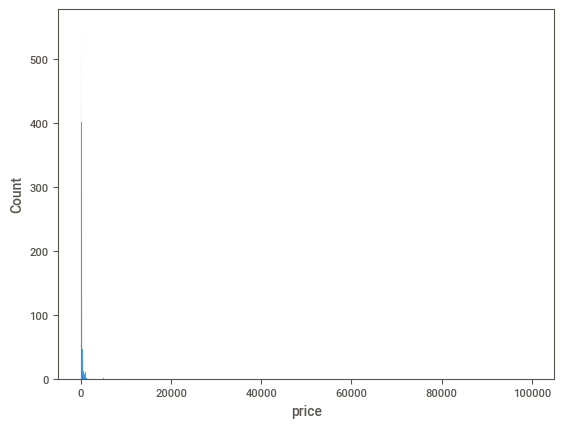

In [18]:
sns.histplot(data_cleaned["price"])
plt.show()

### Remove Outliers based on IQR

In [20]:
def remove_outliers_iqr(data_cleaned, price):
    Q1 = data_cleaned[price].quantile(0.25)
    Q3 = data_cleaned[price].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_cleaned[(data_cleaned[price] >= lower_bound) & (data_cleaned[price] <= upper_bound)]

data_no_outliers = remove_outliers_iqr(data_cleaned, 'price')

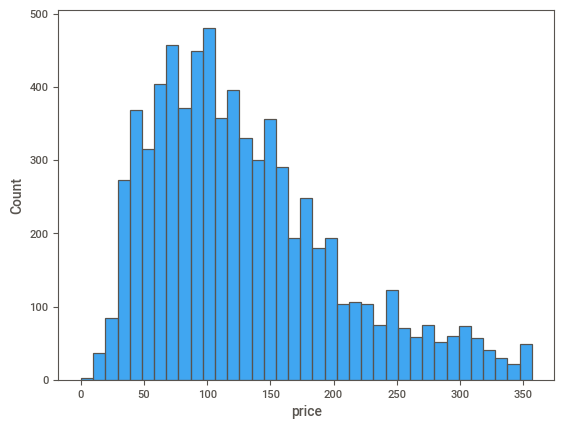

In [21]:
sns.histplot(data_no_outliers["price"])
plt.show()